# Linear Regression

## Question 1

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted

## Question 2

In [3]:
pip install opendatasets


     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ----------------------------- ---------- 61.4/82.1 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 909.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105134 sha256=c9d85b5a0c0a2fefb2a1629390b1aad24a70855d52a0d8877dd6eeebdced5fee
  Stored in directory: c:\users\dubey\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

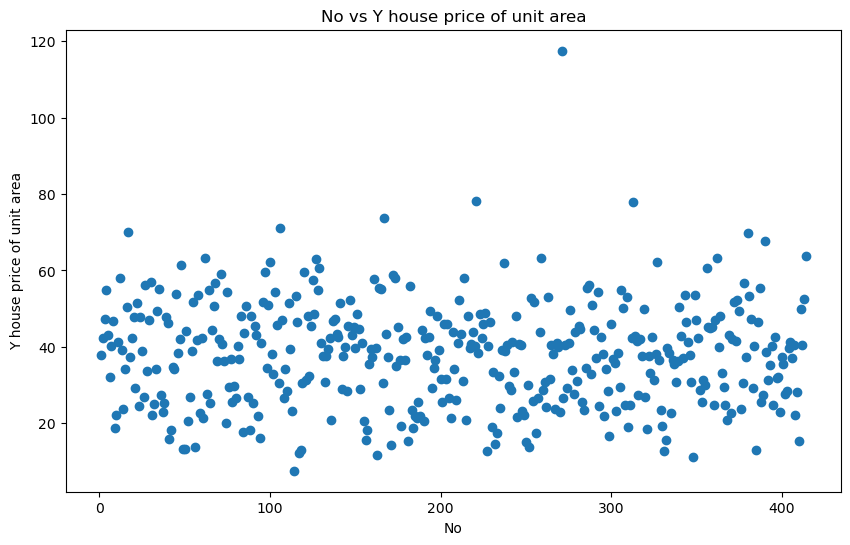

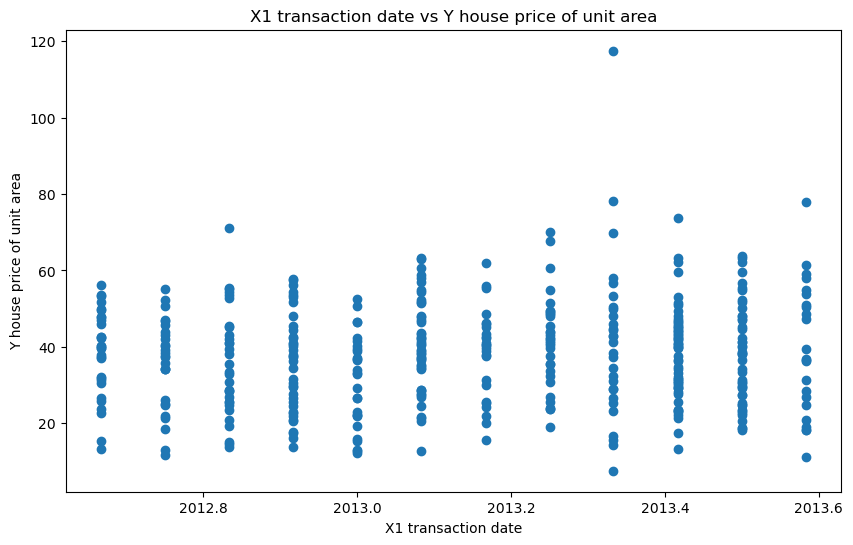

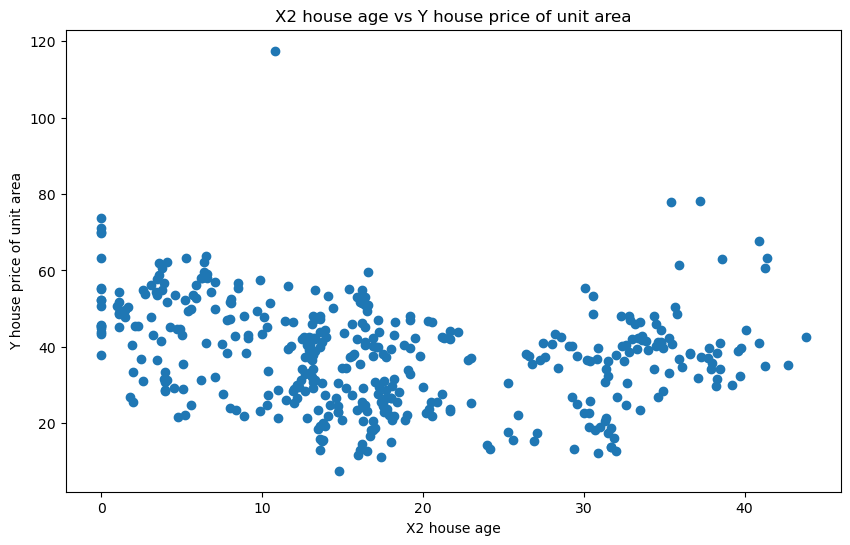

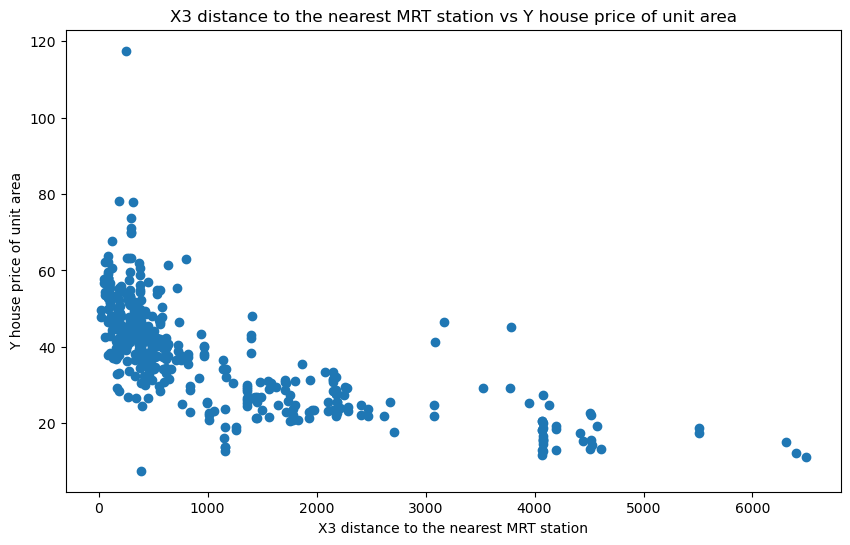

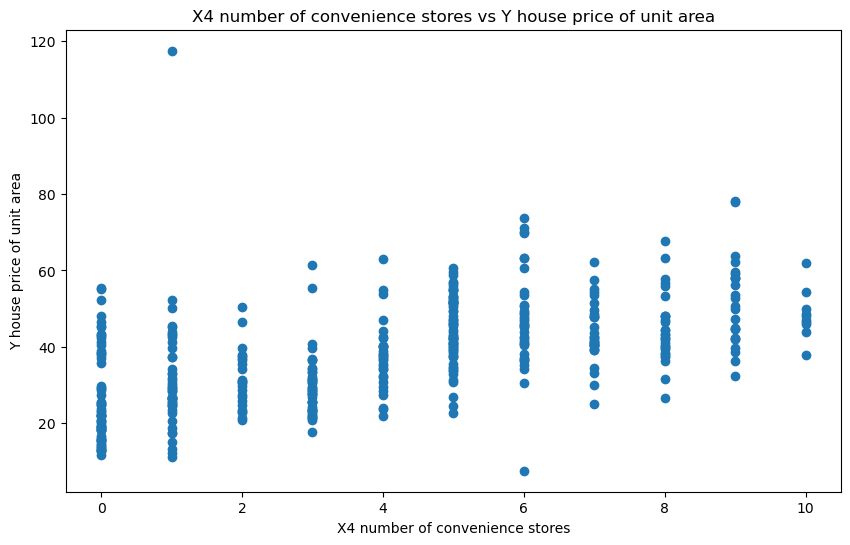

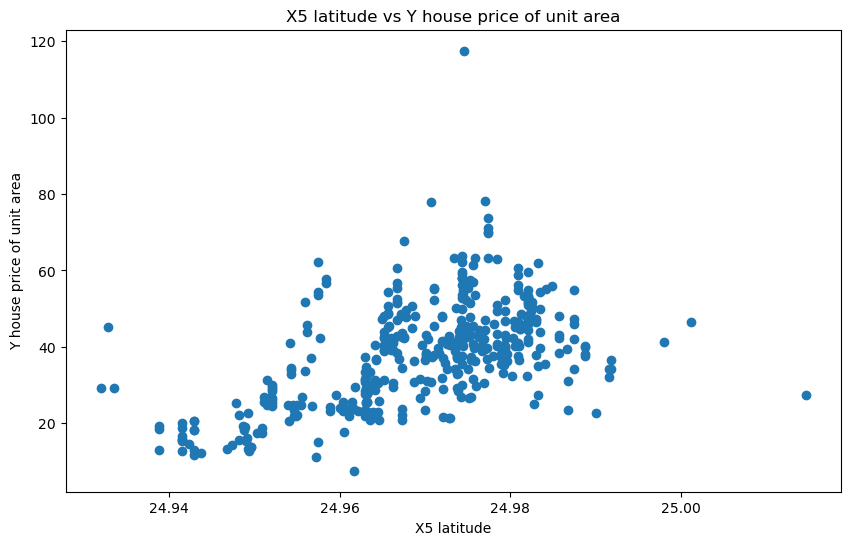

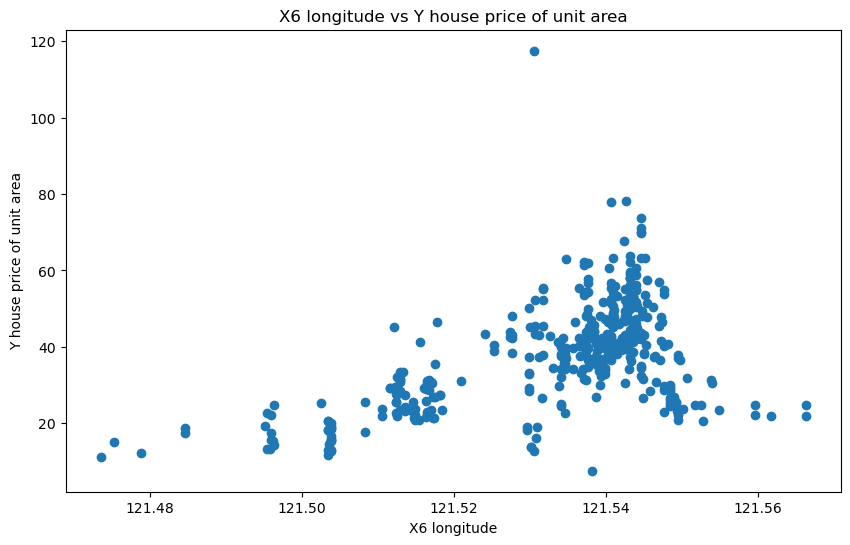

Custom Model MSE: 73.60822495750588
Custom Model R^2: 0.5359420612459198
sklearn Model MSE: 73.60822495750588
sklearn Model R^2: 0.5359420612459198


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

csv_file = r"C:\Users\dubey\Downloads\Real estate.csv"
df = pd.read_csv(csv_file)
print(df.head())

print(df.isnull().sum())

target_column = 'Y house price of unit area'

for column in df.columns[:-1]: 
    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.title(f'{column} vs {target_column}')
    plt.show()

df = df.drop(columns=['X5 latitude', 'X6 longitude', 'X1 transaction date'])

X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_custom = model.predict(X_test_scaled)

mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

print(f'Custom Model MSE: {mse_custom}')
print(f'Custom Model R^2: {r2_custom}')

sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)

y_pred_sklearn = sklearn_model.predict(X_test_scaled)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f'sklearn Model MSE: {mse_sklearn}')
print(f'sklearn Model R^2: {r2_sklearn}')


## Question 3

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred > 0.5).astype(int).flatten()
    
custom_model = LogisticRegression(learning_rate=0.1, epochs=1000)
custom_model.fit(X_train, y_train)
y_pred_custom = custom_model.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f'Custom Model Accuracy: {accuracy_custom}')

print('Custom Model Classification Report:')
print(classification_report(y_test, y_pred_custom))
print('Custom Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_custom))

sklearn_model = SklearnLogisticRegression(max_iter=1000, penalty='none')
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'sklearn Model Accuracy: {accuracy_sklearn}')

print('sklearn Model Classification Report:')
print(classification_report(y_test, y_pred_sklearn))
print('sklearn Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_sklearn))
for penalty in ['none', 'l1', 'l2', 'elasticnet']:
    if penalty == 'elasticnet':
        sklearn_model = SklearnLogisticRegression(max_iter=1000, penalty=penalty, solver='saga', l1_ratio=0.5)
    elif penalty == 'l1':
        sklearn_model = SklearnLogisticRegression(max_iter=1000, penalty=penalty, solver='liblinear', l1_ratio=0.5)
    else:
        sklearn_model = SklearnLogisticRegression(max_iter=1000, penalty=penalty)
        
    sklearn_model.fit(X_train, y_train)
    y_pred_sklearn = sklearn_model.predict(X_test)
    
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print(f'sklearn Model Accuracy with {penalty} penalty: {accuracy_sklearn}')
    
    print(f'sklearn Model Classification Report with {penalty} penalty:')
    print(classification_report(y_test, y_pred_sklearn))
    
    print(f'sklearn Model Confusion Matrix with {penalty} penalty:')
    print(confusion_matrix(y_test, y_pred_sklearn))
    print('---')


Custom Model Accuracy: 0.965034965034965
Custom Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Custom Model Confusion Matrix:
[[50  4]
 [ 1 88]]
sklearn Model Accuracy: 0.9300699300699301
sklearn Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.98      0.91      0.94        89

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.93      0.93      0.93       143

sklearn Model Confusion Matrix:
[[52  2]
 [ 8 81]]
sklearn Model Accuracy with none penalty: 0.9300699300699301
sklearn Model Classificatio

C:\Users\dubey\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dubey\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dubey\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter 

dataset_url = r"C:\Users\dubey\Downloads\glass.csv"
df = pd.read_csv(dataset_url)

print(df.head())

df = df.drop(columns=['RI'])

X = df.drop(columns=['Type']).values
y = df['Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
    
knn_custom = KNN(k=3)
knn_custom.fit(X_train, y_train)

y_pred_custom = knn_custom.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f'Custom KNN Model Accuracy: {accuracy_custom}')


knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)

y_pred_sklearn = knn_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'sklearn KNN Model Accuracy: {accuracy_sklearn}')


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Custom KNN Model Accuracy: 0.6851851851851852
sklearn KNN Model Accuracy: 0.7037037037037037
